<a href="https://colab.research.google.com/github/johnson10404/Astro5205/blob/main/Astro5205_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.io.ascii as ap
import astropy.units as u
from astropy.constants import R_earth, R_jup, M_earth, M_jup

In [9]:
from google.colab import drive
drive.mount('/content/drive')

tab = ap.read("/content/drive/My Drive/Colab Notebooks/PS_2025.01.21_11.51.39.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# This is to print out the names of all columns in the table
tab.colnames

['pl_name',
 'hostname',
 'default_flag',
 'sy_snum',
 'sy_pnum',
 'discoverymethod',
 'disc_year',
 'disc_facility',
 'soltype',
 'pl_controv_flag',
 'pl_refname',
 'pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_orbsmaxlim',
 'pl_rade',
 'pl_radeerr1',
 'pl_radeerr2',
 'pl_radelim',
 'pl_radj',
 'pl_radjerr1',
 'pl_radjerr2',
 'pl_radjlim',
 'pl_bmasse',
 'pl_bmasseerr1',
 'pl_bmasseerr2',
 'pl_bmasselim',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'pl_bmassjlim',
 'pl_bmassprov',
 'pl_orbeccen',
 'pl_orbeccenerr1',
 'pl_orbeccenerr2',
 'pl_orbeccenlim',
 'pl_insol',
 'pl_insolerr1',
 'pl_insolerr2',
 'pl_insollim',
 'pl_eqt',
 'pl_eqterr1',
 'pl_eqterr2',
 'pl_eqtlim',
 'ttv_flag',
 'st_refname',
 'st_spectype',
 'st_teff',
 'st_tefferr1',
 'st_tefferr2',
 'st_tefflim',
 'st_rad',
 'st_raderr1',
 'st_raderr2',
 'st_radlim',
 'st_mass',
 'st_masserr1',
 'st_masserr2',
 'st_masslim',
 'st_met',
 'st_me

In [18]:
# Data for the Solar System
data = {
    "Name":["mercury","venus","earth","mars","jupiter","saturn","uranus","neptune"],
    "pl_orbper":[88,225,365,687,4333,10759,30687,60190], # in days
    "pl_rade":[4879,12104,12756,6792,142984,120536,51118,49528], # diameter in km
    "pl_bmasse":[0.330,4.87,5.97,0.642,1898,568,86.8,102], # in 10e24 kg
    "pl_orbsmax":[0.387,0.723,1,1.524,5.20,9.54,19.19,30.1]
}

solar_sys = pd.DataFrame(data)

solar_sys["pl_rade"]= solar_sys["pl_rade"] * 10**(3)/(2*R_earth)
solar_sys["pl_bmasse"] = solar_sys["pl_bmasse"] * 10**(24)/M_earth

print(solar_sys)

# Note that the numbers are not perfect, as I did not go into exact sig figs when doing calculations to save time.

      Name  pl_orbper    pl_rade   pl_bmasse  pl_orbsmax
0  mercury         88   0.382481    0.055256       0.387
1    venus        225   0.948872    0.815449       0.723
2    earth        365   0.999984    0.999637       1.000
3     mars        687   0.532447    0.107499       1.524
4  jupiter       4333  11.208981  317.807544       5.200
5   saturn      10759   9.449209   95.107842       9.540
6   uranus      30687   4.007306   14.534086      19.190
7  neptune      60190   3.882661   17.079225      30.100


In [14]:
ind_t = np.where((tab["default_flag"] == 1) & (tab["discoverymethod"]=="Transit"))
ind_rv = np.where((tab["default_flag"]==1) & (tab["discoverymethod"]=="Radial Velocity"))

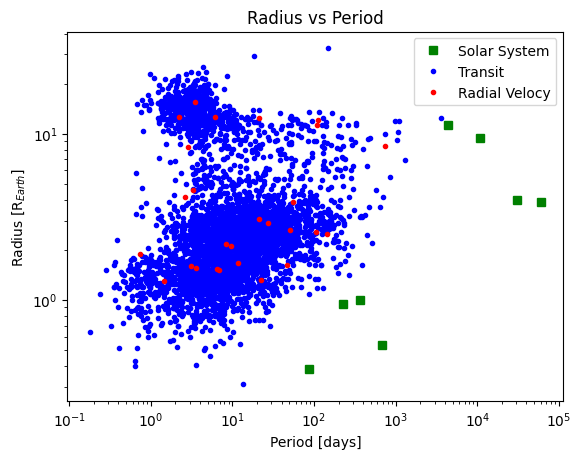

In [20]:
plt.plot(solar_sys["pl_orbper"],solar_sys["pl_rade"],"gs",label = "Solar System")
plt.plot(tab["pl_orbper"][ind_t], tab["pl_rade"][ind_t], "b.",label="Transit")
plt.plot(tab["pl_orbper"][ind_rv], tab["pl_rade"][ind_rv], "r.",label="Radial Velocy")

plt.title("Radius vs Period")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel("Radius [R$_{Earth}$]")
#plt.xlim(10**(-0.5), 10**(5))
#plt.ylim(10**(-1.5), 10**(0.5))

plt.legend()
plt.show()

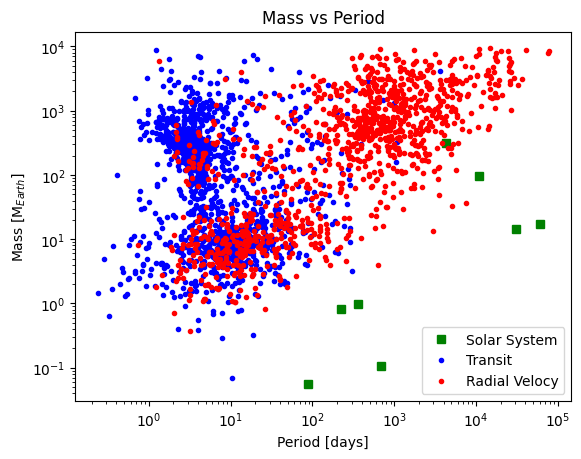

In [24]:
plt.plot(solar_sys["pl_orbper"],solar_sys["pl_bmasse"],"gs",label = "Solar System")
plt.plot(tab["pl_orbper"][ind_t], tab["pl_bmasse"][ind_t], "b.",label="Transit")
plt.plot(tab["pl_orbper"][ind_rv], tab["pl_bmasse"][ind_rv], "r.",label="Radial Velocy")

plt.title("Mass vs Period")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Mass [M$_{Earth}$]")
#plt.xlim(10**(-0.5), 10**(5))
#plt.ylim(10**(-3.5), 10**(2))

plt.legend()
plt.show()

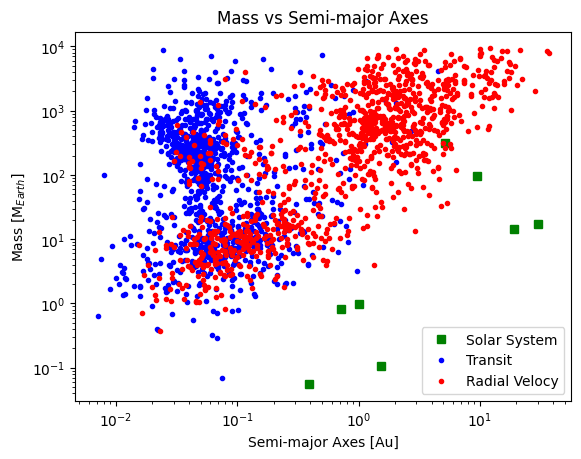

In [25]:
plt.plot(solar_sys["pl_orbsmax"],solar_sys["pl_bmasse"],"gs",label = "Solar System")
plt.plot(tab["pl_orbsmax"][ind_t], tab["pl_bmasse"][ind_t], "b.",label="Transit")
plt.plot(tab["pl_orbsmax"][ind_rv], tab["pl_bmasse"][ind_rv], "r.",label="Radial Velocy")

plt.title("Mass vs Semi-major Axes")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-major Axes [Au]")
plt.ylabel(r"Mass [M$_{Earth}$]")
#plt.xlim(10**(-2.25), 10**(2))
#plt.ylim(10**(-3.25), 10**(1.75))

plt.legend()
plt.show()

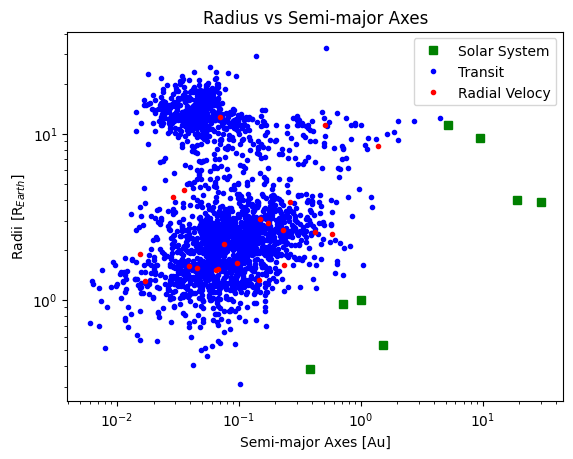

In [26]:
plt.plot(solar_sys["pl_orbsmax"],solar_sys["pl_rade"],"gs",label = "Solar System")
plt.plot(tab["pl_orbsmax"][ind_t], tab["pl_rade"][ind_t], "b.",label="Transit")
plt.plot(tab["pl_orbsmax"][ind_rv], tab["pl_rade"][ind_rv], "r.",label="Radial Velocy")

plt.title("Radius vs Semi-major Axes")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-major Axes [Au]")
plt.ylabel(r"Radii [R$_{Earth}$]")
#plt.xlim(10**(-2.3), 10**(1.25))
#plt.ylim(10**(-1.75), 10**(0.75))

plt.legend()
plt.show()